In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [694]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,Crypto,Date,Open,High,Low,Close,Adj Close,Volume
0,0,Bitcoin,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,1,Bitcoin,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,2,Bitcoin,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,3,Bitcoin,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,4,Bitcoin,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09


In [695]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Crypto,Date,Open,High,Low,Close,Adj Close,Volume
0,Bitcoin,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,Bitcoin,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,Bitcoin,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,Bitcoin,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,Bitcoin,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09


In [696]:
df.isnull().sum()

Crypto        0
Date          0
Open         69
High         69
Low          69
Close        69
Adj Close    69
Volume       69
dtype: int64

In [697]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df1 = df.drop(columns=['Date','Crypto'])
df_filled = imputer.fit_transform(df1)
df_filled

array([[6.56147998e+03, 6.76497998e+03, 6.46175000e+03, 6.63575000e+03,
        6.63575000e+03, 3.19711002e+09],
       [6.63475977e+03, 7.34225000e+03, 6.63475977e+03, 7.31554004e+03,
        7.31554004e+03, 4.20088013e+09],
       [7.32324023e+03, 7.96737988e+03, 7.17658008e+03, 7.87168994e+03,
        7.87168994e+03, 5.12380979e+09],
       ...,
       [2.89857635e+02, 2.90369171e+02, 2.72046112e+02, 2.82341278e+02,
        2.82341278e+02, 1.18940139e+09],
       [2.82365265e+02, 2.86084473e+02, 2.74052704e+02, 2.76579437e+02,
        2.76579437e+02, 9.56106804e+08],
       [2.76801178e+02, 2.76896881e+02, 2.68414490e+02, 2.68676697e+02,
        2.68676697e+02, 1.14972915e+09]])

In [698]:
df2 = pd.DataFrame(df_filled, columns=df1.columns)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
0,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09


In [699]:
df2['Crypto']=df['Crypto']
df2['Date']=df['Date']
df2.insert(0,'Date',df2.pop('Date'))
df2.insert(0,'Crypto',df2.pop('Crypto'))
df2

,Crypto,Date,Open,High,Low,Close,Adj Close,Volume
0,Bitcoin,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,Bitcoin,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,Bitcoin,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,Bitcoin,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,Bitcoin,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09
...,...,...,...,...,...,...,...,...
8097,BNB,2022-11-10,266.885773,311.074005,264.467743,304.080048,304.080048,2.461276e+09
8098,BNB,2022-11-11,303.986877,304.912781,280.626862,289.820557,289.820557,1.625174e+09
8099,BNB,2022-11-12,289.857635,290.369171,272.046112,282.341278,282.341278,1.189401e+09
8100,BNB,2022-11-13,282.365265,286.084473,274.052704,276.579437,276.579437,9.561068e+08


In [700]:
df=df2
df.isnull().sum()

Crypto       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [701]:
df = df[df['Crypto']=='Bitcoin']

In [702]:
df

,Crypto,Date,Open,High,Low,Close,Adj Close,Volume
0,Bitcoin,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,Bitcoin,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,Bitcoin,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,Bitcoin,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,Bitcoin,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09
...,...,...,...,...,...,...,...,...
1822,Bitcoin,2022-11-10,15883.158203,18054.312500,15834.018555,17586.771484,17586.771484,8.320228e+10
1823,Bitcoin,2022-11-11,17583.251953,17650.943359,16543.482422,17034.292969,17034.292969,5.587162e+10
1824,Bitcoin,2022-11-12,17036.875000,17066.675781,16651.775391,16799.185547,16799.185547,2.971770e+10
1825,Bitcoin,2022-11-13,16799.722656,16920.765625,16320.634766,16353.365234,16353.365234,2.720918e+10


In [703]:
data = df['Close']
data = data.values
data = data.reshape(-1,1)
data

array([[ 6635.75    ],
       [ 7315.540039],
       [ 7871.689941],
       ...,
       [16799.185547],
       [16353.365234],
       [15889.691406]])

In [704]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data.shape
data

array([[0.0528367 ],
       [0.06340392],
       [0.07204918],
       ...,
       [0.21082558],
       [0.20389538],
       [0.19668765]])

In [705]:
train_data = data[0:int(len(data)*0.8),:]
train_data

array([[0.0528367 ],
       [0.06340392],
       [0.07204918],
       ...,
       [0.95932124],
       [0.94697834],
       [0.95185298]])

In [706]:
train_data[:5]

array([[0.0528367 ],
       [0.06340392],
       [0.07204918],
       [0.06952004],
       [0.07078165]])

In [707]:
train_data[:20]

array([[0.0528367 ],
       [0.06340392],
       [0.07204918],
       [0.06952004],
       [0.07078165],
       [0.07461097],
       [0.07716264],
       [0.07515145],
       [0.07798512],
       [0.07464641],
       [0.07798731],
       [0.08633845],
       [0.0947269 ],
       [0.10230967],
       [0.10604743],
       [0.10340186],
       [0.10876466],
       [0.12029893],
       [0.12183786],
       [0.12570232]])

In [708]:
x = []
y = []
i=0
while i < len(train_data):
    if i+5 < len(train_data):
        x.append(train_data[i:i+5,0])
        y.append(train_data[i+5,0])
    i+=5

In [709]:
# x = []
# y = []
# for i in range(5,len(train_data)):
#     x.append(train_data[i-5:i,0])
#     y.append(train_data[i,0])

In [710]:
x

[array([0.0528367 , 0.06340392, 0.07204918, 0.06952004, 0.07078165]),
 array([0.07461097, 0.07716264, 0.07515145, 0.07798512, 0.07464641]),
 array([0.07798731, 0.08633845, 0.0947269 , 0.10230967, 0.10604743]),
 array([0.10340186, 0.10876466, 0.12029893, 0.12183786, 0.12570232]),
 array([0.13089429, 0.13492818, 0.17184404, 0.22793288, 0.20725361]),
 array([0.18562764, 0.18993667, 0.21296479, 0.22040454, 0.20474777]),
 array([0.20716966, 0.22493586, 0.25276888, 0.2472256 , 0.24681208]),
 array([0.22602087, 0.20811168, 0.1953385 , 0.16469807, 0.17818167]),
 array([0.16615929, 0.1677262 , 0.19995375, 0.19589189, 0.17674066]),
 array([0.17751324, 0.15102485, 0.16974394, 0.16198395, 0.18257929]),
 array([0.18598206, 0.19217201, 0.22062372, 0.22213934, 0.20582659]),
 array([0.18550172, 0.17656812, 0.1824425 , 0.15807598, 0.16701114]),
 array([0.17291197, 0.1637685 , 0.16451154, 0.12830297, 0.12360997]),
 array([0.12806047, 0.13012016, 0.15020097, 0.13000667, 0.11961186]),
 array([0.11863253, 

In [711]:
y

[0.07461096782813725,
 0.0779873081326724,
 0.10340186175184157,
 0.1308942916809213,
 0.18562764105721852,
 0.2071696645995842,
 0.22602086881483263,
 0.16615928885475306,
 0.17751323936042013,
 0.18598206016905505,
 0.18550171881816976,
 0.17291196943273368,
 0.1280604720661634,
 0.11863253216365721,
 0.13290112327946538,
 0.08695760153106658,
 0.06815690284428275,
 0.08844711208737874,
 0.12243013129029537,
 0.10521111914115377,
 0.11641271816410753,
 0.12864650003265227,
 0.09483571876790392,
 0.07823787743720675,
 0.08384708695865603,
 0.08442954751082649,
 0.061074683977530485,
 0.0655890531399555,
 0.05886451720881191,
 0.07242644850690594,
 0.07658406835626236,
 0.088514103624008,
 0.09500563409071758,
 0.10115174748821787,
 0.09323880619281574,
 0.08529726483366754,
 0.07794501526478029,
 0.06717011727811584,
 0.060612847659618184,
 0.06850122690980143,
 0.06904203218086136,
 0.052006757196320245,
 0.050715139642630754,
 0.044255017615440685,
 0.045396629090493516,
 0.05250139

In [712]:
len(x)

292

In [713]:
len(y)

292

In [714]:
x, y = np.array(x), np.array(y)
x.shape
y.shape

(292,)

In [715]:
x = np.reshape(x, (x.shape[0], x.shape[1],1))
x.shape
y.shape

(292,)

In [716]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_53 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_54 (LSTM)              (None, 50)                20200     
                                                                 
 dense_50 (Dense)            (None, 25)                1275      
                                                                 
 dense_51 (Dense)            (None, 25)                650       
                                                                 
 dense_52 (Dense)            (None, 1)                 26        
                                                                 
Total params: 32,551
Trainable params: 32,551
Non-trainable params: 0
_________________________________________________________________


In [717]:
model.compile(optimizer='adam', loss= 'mean_squared_error')


In [718]:
model.fit(x, y, batch_size=1, epochs=5)

Epoch 1/5
292/292 [==============================] - 2s 2ms/step - loss: 0.0046
Epoch 2/5
292/292 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 3/5
292/292 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 4/5
292/292 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 5/5
292/292 [==============================] - 1s 3ms/step - loss: 0.0016


In [719]:
test_data = data[int(len(data)*0.8)-5:,:]
x_test = []
y_test = data[int(len(data)*0.8):,:]

In [720]:
for i in range(5,len(test_data)):
    x_test.append(test_data[i-5:i,0])

In [721]:
len(x_test)

366

In [722]:
len(y_test)

366

In [723]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [724]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 2ms/step


In [725]:
predictions

array([[66555.94 ],
       [66110.44 ],
       [65959.54 ],
       [65392.53 ],
       [64759.668],
       [63558.445],
       [61976.695],
       [60916.805],
       [60604.508],
       [59994.285],
       [60137.906],
       [59854.18 ],
       [59234.25 ],
       [58469.49 ],
       [58175.793],
       [57799.84 ],
       [57924.44 ],
       [57874.617],
       [58721.03 ],
       [59198.14 ],
       [58755.81 ],
       [57495.348],
       [56016.72 ],
       [54392.12 ],
       [52944.87 ],
       [52199.44 ],
       [52205.55 ],
       [51928.098],
       [51447.484],
       [51094.168],
       [50535.195],
       [50481.18 ],
       [50658.938],
       [50280.918],
       [49557.547],
       [49610.336],
       [49646.008],
       [49132.9  ],
       [49161.74 ],
       [49660.62 ],
       [50305.582],
       [51161.63 ],
       [52018.33 ],
       [52434.797],
       [52922.03 ],
       [52555.426],
       [51843.793],
       [51102.414],
       [50117.527],
       [49263.055],


In [726]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [727]:
y_plot = scaler.inverse_transform(y_test)

In [728]:
len(predictions)

366

In [729]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_plot, predictions)))
print("Root Mean squared Error - RMSE : " + str(np.sqrt(mean_squared_error(y_plot, predictions))))

Mean Absolute Error - MAE : 2219.972690872268
Root Mean squared Error - RMSE : 2863.814925477816


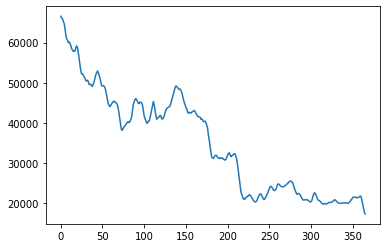

In [730]:
plt.plot(predictions)

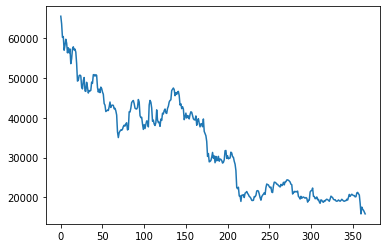

In [731]:
plt.plot(y_plot)

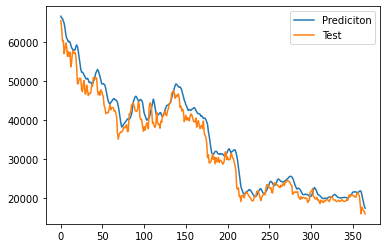

In [732]:
plt.plot(predictions)
plt.plot(y_plot)
plt.legend(['Prediciton','Test'])